#### Reviews Analysis

This notebook studies the releation between the different pricing groups and the number of reviews and scores.

The defined pricing groups are (same than the amenities study):
- low: < 25q
- medium-low: >= 25q and < 40q
- medium: >= 40q and < 65q
- medium-high:  >= 65q and < 75q
- high: > 75q

In [1]:
import numpy as np
import pandas as pd
import math
import re
import common as c

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

In [2]:
listings_df = pd.read_csv('./data/boston/listings.csv')

In [3]:
## Look at the data
reviews_prices_df = listings_df[['id','review_scores_rating', 'number_of_reviews', 'price']].copy()
reviews_prices_df.head()

,id,review_scores_rating,number_of_reviews,price
0,3781,99.0,16,$146.00
1,5506,95.0,107,$145.00
2,6695,96.0,115,$169.00
3,10730,96.0,32,$85.00
4,10813,98.0,10,$87.00


## Data Preparation

In [4]:
# Clean the price of all non-numeric chars and convert it to float.
reviews_prices_df['price'] = c.clean_price(reviews_prices_df)

# Exclude listings with prices equal to ZERO.
reviews_prices_df = reviews_prices_df[reviews_prices_df['price'] > .0]
reviews_prices_df.head()

,id,review_scores_rating,number_of_reviews,price
0,3781,99.0,16,146.0
1,5506,95.0,107,145.0
2,6695,96.0,115,169.0
3,10730,96.0,32,85.0
4,10813,98.0,10,87.0


In [5]:
# Checks the correlation between Price and Review Scores
# Checks the correlation between Price and Number of Reviews.
corr_price_scores = reviews_prices_df['price'].corr(reviews_prices_df['review_scores_rating'])
corr_nreviews_scores = reviews_prices_df['number_of_reviews'].corr(reviews_prices_df['review_scores_rating'])
print("Correlation between price and reviews score rate is: {}".format(corr_price_scores))
print("Correlation between number of reviews and reviews score rate is: {}".format(corr_nreviews_scores))

Correlation between price and reviews score rate is: 0.04094513093706753
Correlation between number of reviews and reviews score rate is: 0.1358165163518211


Price has a positive correlation between both, **Review Scores** and **Number of Reviews** which indicates that there is a relation between them.

In [6]:
# Shows the mean of reviews scores and number of reviews by pricing groups.
reviews_prices_df['price_range'] = c.create_pricing_groups(reviews_prices_df)
reviews_prices_df_agg = reviews_prices_df.groupby('price_range').agg({"review_scores_rating": ['mean'], "number_of_reviews": ['mean']})
reviews_prices_df_agg

,review_scores_rating,number_of_reviews
,mean,mean
price_range,,
high,94.615646,32.838323
low,93.580938,39.195572
medium,92.318105,38.355372
medium_high,95.298343,31.126126
medium_low,93.750000,48.552063


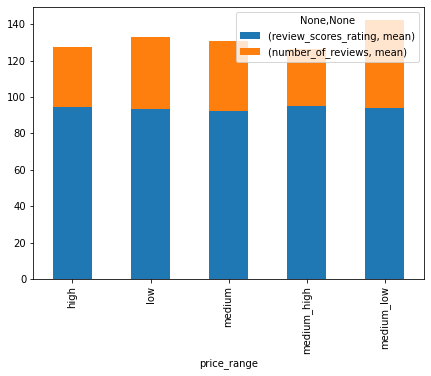

In [7]:
reviews_prices_df_agg.plot.bar(stacked=True,figsize=(7,5))

## Conclusions

As we can see by the table above, we cannot say that units with higher pricing have better reviews since the low pricing group has better scores and more reviews than the medium pricing group. 

Units with higher prices have less but better reviews which may indicate a lower number of rentals or perhaps the target group does not really care much on reviewing.